<a href="https://colab.research.google.com/github/freddy120/kalmantp1/blob/main/KalmanFilter_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FILTRO DE KALMAN. ESTIMACION DE LA TRAYECTORIA DE UN VEHICULO

CEIA AM 2021

Freddy Mendoza Ticona


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Cargar datos:

In [2]:
p_data = np.genfromtxt('posicion.dat', 
                     delimiter=' ')
v_data = np.genfromtxt('velocidad.dat',
                     delimiter=' ')
a_data = np.genfromtxt('aceleracion.dat',
                     delimiter=' ')

In [3]:
print(p_data.shape)
print(v_data.shape)
print(a_data.shape)

(351, 3)
(351, 3)
(351, 3)



## Data real

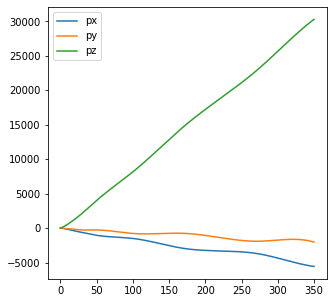

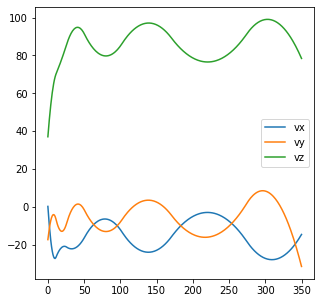

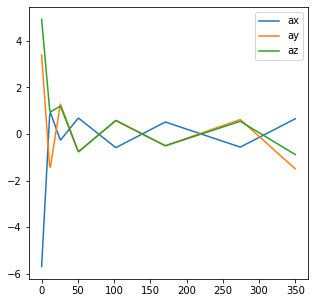

In [5]:
# posicion
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p_data)), p_data )
plt.legend(['px','py','pz'])
plt.show()

# velocidad
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v_data)), v_data )
plt.legend(['vx','vy','vz'])
plt.show()

# aceleracion
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a_data)), a_data)
plt.legend(['ax','ay','az'])
plt.show()


## PRIMER CASO:

1) Se mide la posicion afectada por ruido blanco (gaussiano) de 10m de desvio estandar.
Es decir que se le debe agregar ruido blanco con una distribucion gaussiana con
media cero y desvio 10.

In [7]:
p_measurements = p_data + np.random.normal(0, 10, (len(p_data), 3))

In [8]:
dt = 1  ## 1 seconds
h = dt
x0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
P0 = np.diag([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])
Q = 0.3*np.identity(9)


F = np.array([[1, 0, 0, h, 0, 0, h**2/2, 0, 0], 
              [0, 1, 0, 0, h, 0, 0, h**2/2, 0], 
              [0, 0, 1, 0, 0, h, 0, 0, h**2/2],
              [0, 0, 0, 1, 0, 0, h, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, h, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, h],
              [0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0]])

R = 100*np.identity(3)

In [9]:
z_estimations = []
x_estimations = []
innovations = []

# initialization
x=x0
P=P0
n=F.shape[1]

for z in p_measurements:
    # predict next state
    x = np.dot(F, x) 
    P = np.dot(np.dot(F, P), F.T) + Q 
    
    # Kalman gain 
    S = R + np.dot(H, np.dot(P, H.T))
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S)) 
    
    # State update (estimate current state)
    innovation_n = z - np.dot(H, x)
    innovations.append(innovation_n)
    x = x + np.dot(K,  z - np.dot(H, x)) 
    
    x_estimations.append(x)
    z_estimations.append(np.dot(H, x))

    #covarianza update
    I = np.identity(n)
    P = np.dot(np.dot(I - np.dot(K, H), P), 
               (I - np.dot(K, H)).T) + np.dot(np.dot(K, R), K.T) 

x_e = np.array(x_estimations)
z_e = np.array(z_estimations)
innovations = np.array(innovations)

## Grafica Innovaciones 
Error en la estimacion de las mediciones

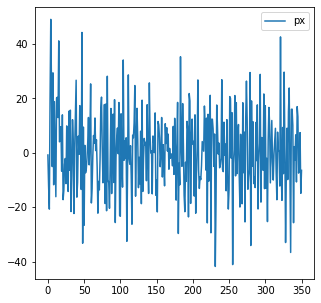

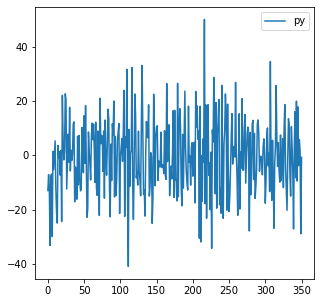

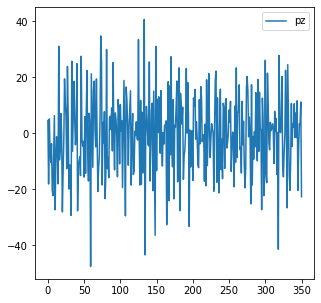

In [19]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,0])
plt.legend(['px'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,1])
plt.legend(['py'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,2])
plt.legend(['pz'])
plt.show()

## Graficas Estimacion vs Datos Reales

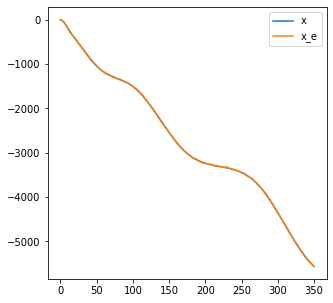

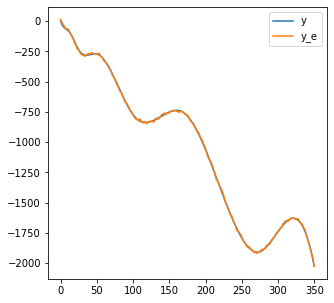

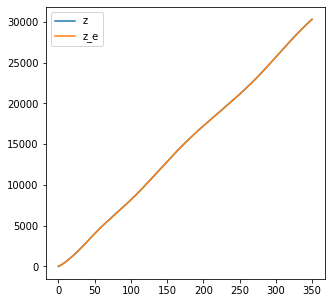

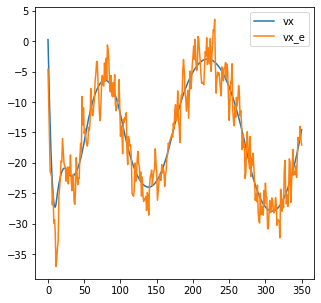

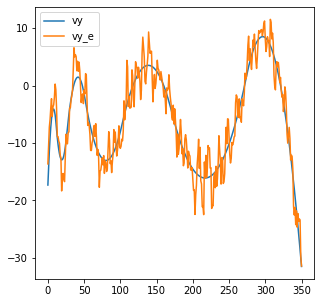

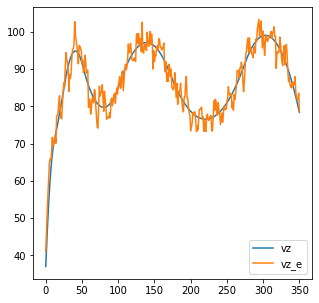

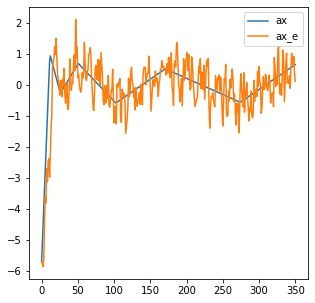

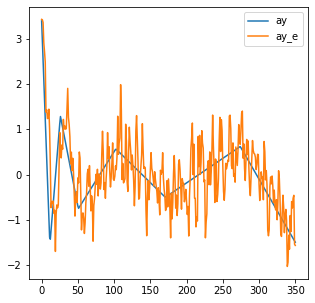

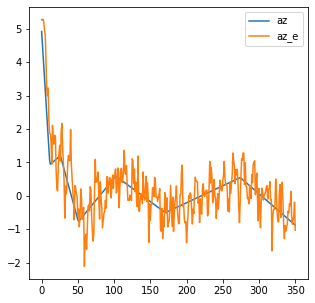

In [20]:
#posicion
p = p_data
p_e = x_e[:,0:3]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,0])
plt.plot(range(len(p_e)), p_e[:,0])
plt.legend(['x', 'x_e'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,1])
plt.plot(range(len(p_e)), p_e[:,1])
plt.legend(['y', 'y_e'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,2])
plt.plot(range(len(p_e)), p_e[:,2])
plt.legend(['z', 'z_e'])
plt.show()

#velocidad
v = v_data
v_e = x_e[:,3:6]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,0])
plt.plot(range(len(v_e)), v_e[:,0])
plt.legend(['vx', "vx_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,1])
plt.plot(range(len(v_e)), v_e[:,1])
plt.legend(['vy', "vy_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,2])
plt.plot(range(len(v_e)), v_e[:,2])
plt.legend(['vz', "vz_e"])
plt.show()


#aceleracion
a = a_data
a_e = x_e[:,6:9]

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,0])
plt.plot(range(len(a_e)), a_e[:,0])
plt.legend(['ax', "ax_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,1])
plt.plot(range(len(a_e)), a_e[:,1])
plt.legend(['ay', "ay_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,2])
plt.plot(range(len(a_e)), a_e[:,2])
plt.legend(['az', "az_e"])
plt.show()

## SEGUNDO CASO:

2) Se mide la posicion afectada por ruido blanco (uniforme) de 10m de desvio estandar.
Similar al item anterior. La idea es comparar con el item anterior. Analizar si hubo
algun cambio.

In [22]:
p_measurements = p_data + np.random.uniform(-10*math.sqrt(3), 10*math.sqrt(3), (len(p_data), 3))

In [23]:
dt = 1  ## 1 seconds
h = dt
x0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
P0 = np.diag([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])
Q = 0.3*np.identity(9)


F = np.array([[1, 0, 0, h, 0, 0, h**2/2, 0, 0], 
              [0, 1, 0, 0, h, 0, 0, h**2/2, 0], 
              [0, 0, 1, 0, 0, h, 0, 0, h**2/2],
              [0, 0, 0, 1, 0, 0, h, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, h, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, h],
              [0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0]])

R = 100*np.identity(3)

In [24]:
z_estimations = []
x_estimations = []
innovations = []

# initialization
x=x0
P=P0
n=F.shape[1]

for z in p_measurements:
    # predict next state
    x = np.dot(F, x) 
    P = np.dot(np.dot(F, P), F.T) + Q 
    
    # Kalman gain 
    S = R + np.dot(H, np.dot(P, H.T))
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S)) 
    
    # State update (estimate current state)
    innovation_n = z - np.dot(H, x)
    innovations.append(innovation_n)
    x = x + np.dot(K,  z - np.dot(H, x)) 
    
    x_estimations.append(x)
    z_estimations.append(np.dot(H, x))

    #covarianza update
    I = np.identity(n)
    P = np.dot(np.dot(I - np.dot(K, H), P), 
               (I - np.dot(K, H)).T) + np.dot(np.dot(K, R), K.T) 

x_e = np.array(x_estimations)
z_e = np.array(z_estimations)
innovations = np.array(innovations)

## Grafica Innovaciones
Error en la estimacion de las mediciones

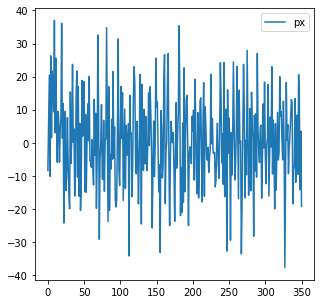

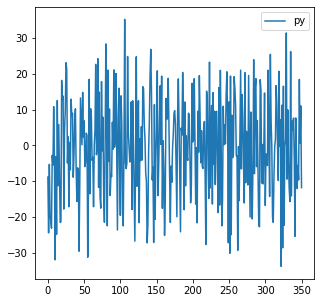

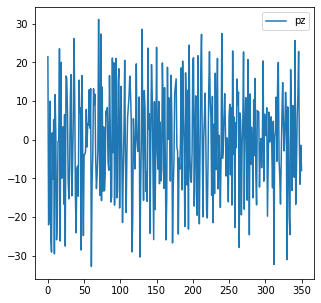

In [26]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,0])
plt.legend(['px'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,1])
plt.legend(['py'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,2])
plt.legend(['pz'])
plt.show()

## Graficas Estimacion vs Datos Reales




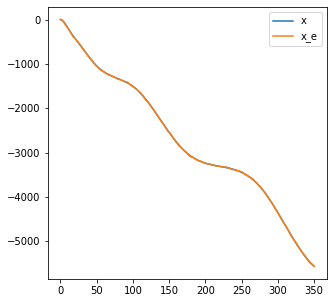

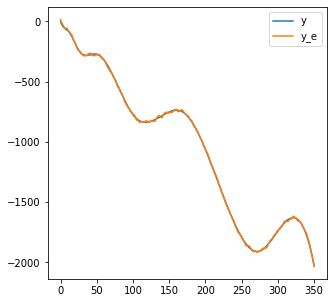

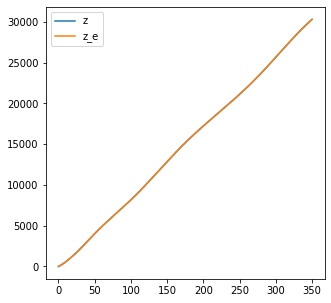

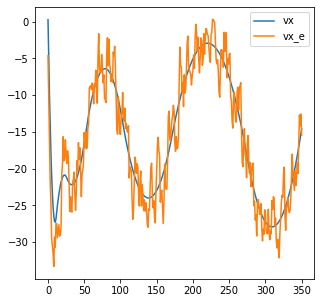

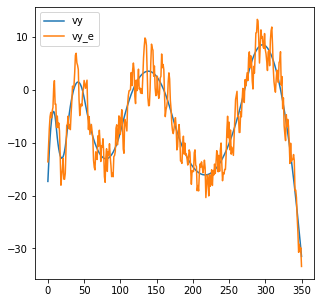

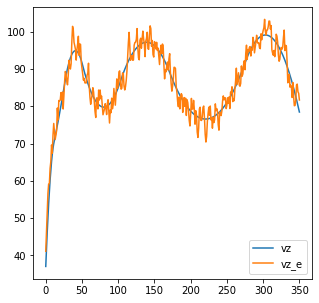

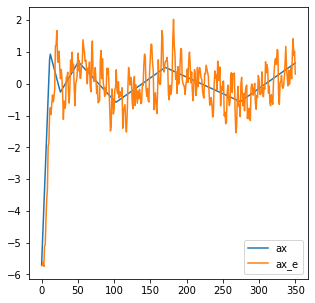

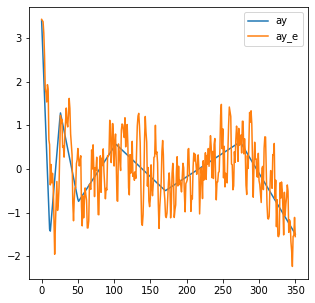

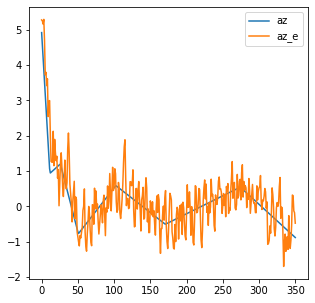

In [27]:
#posicion
p = p_data
p_e = x_e[:,0:3]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,0])
plt.plot(range(len(p_e)), p_e[:,0])
plt.legend(['x', 'x_e'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,1])
plt.plot(range(len(p_e)), p_e[:,1])
plt.legend(['y', 'y_e'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,2])
plt.plot(range(len(p_e)), p_e[:,2])
plt.legend(['z', 'z_e'])
plt.show()

#velocidad
v = v_data
v_e = x_e[:,3:6]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,0])
plt.plot(range(len(v_e)), v_e[:,0])
plt.legend(['vx', "vx_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,1])
plt.plot(range(len(v_e)), v_e[:,1])
plt.legend(['vy', "vy_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,2])
plt.plot(range(len(v_e)), v_e[:,2])
plt.legend(['vz', "vz_e"])
plt.show()


#aceleracion
a = a_data
a_e = x_e[:,6:9]

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,0])
plt.plot(range(len(a_e)), a_e[:,0])
plt.legend(['ax', "ax_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,1])
plt.plot(range(len(a_e)), a_e[:,1])
plt.legend(['ay', "ay_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,2])
plt.plot(range(len(a_e)), a_e[:,2])
plt.legend(['az', "az_e"])
plt.show()

## TERCER CASO:

3) Se mide la posicion y la velocidad afectadas por ruido blanco (gaussiano) de 10m
y 0.2m/s de desvios respectivamente. Analizar si mejora la estimacion

In [28]:
p_measurements = p_data + np.random.normal(0, 10, (len(p_data), 3))
v_measurements = v_data + np.random.normal(0, 0.2, (len(v_data), 3))
pv_measurements = np.concatenate((p_measurements, v_measurements), axis=1)

In [31]:
dt = 1  ## 1 seconds
h = dt
x0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
P0 = np.diag([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])
Q = 0.3*np.identity(9)


F = np.array([[1, 0, 0, h, 0, 0, h**2/2, 0, 0], 
              [0, 1, 0, 0, h, 0, 0, h**2/2, 0], 
              [0, 0, 1, 0, 0, h, 0, 0, h**2/2],
              [0, 0, 0, 1, 0, 0, h, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, h, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, h],
              [0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0]])

R = np.array([[100, 0, 0, 0, 0, 0], 
              [0, 100, 0, 0, 0, 0],
              [0, 0, 100, 0, 0, 0],
              [0, 0, 0, 0.04, 0, 0],
              [0, 0, 0, 0, 0.04, 0],
              [0, 0, 0, 0, 0, 0.04]])



In [33]:
z_estimations = []
x_estimations = []
innovations = []

# initialization
x=x0
P=P0
n=F.shape[1]

for z in np.concatenate((p_measurements, v_measurements), axis=1):
    # predict next state
    x = np.dot(F, x) 
    P = np.dot(np.dot(F, P), F.T) + Q 
    
    # Kalman gain 
    S = R + np.dot(H, np.dot(P, H.T))
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S)) 
    
    # State update (estimate current state)
    innovation_n = z - np.dot(H, x)
    innovations.append(innovation_n)
    x = x + np.dot(K,  z - np.dot(H, x)) 
    
    x_estimations.append(x)
    z_estimations.append(np.dot(H, x))

    #covarianza update
    I = np.identity(n)
    P = np.dot(np.dot(I - np.dot(K, H), P), 
               (I - np.dot(K, H)).T) + np.dot(np.dot(K, R), K.T) 

x_e = np.array(x_estimations)
z_e = np.array(z_estimations)
innovations = np.array(innovations)

## Grafica Innovaciones
Error en la estimacion de las mediciones

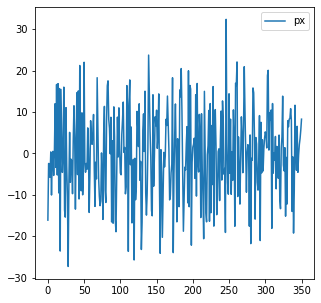

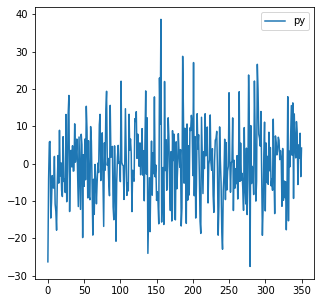

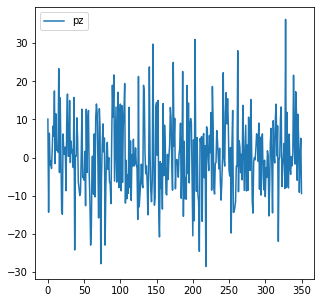

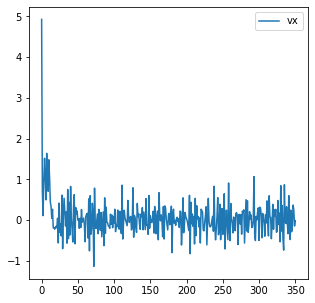

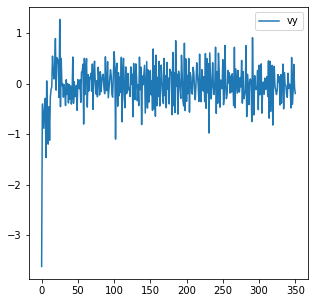

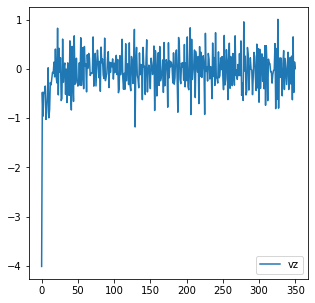

In [34]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,0])
plt.legend(['px'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,1])
plt.legend(['py'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,2])
plt.legend(['pz'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,3])
plt.legend(['vx'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,4])
plt.legend(['vy'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,5])
plt.legend(['vz'])
plt.show()

## Graficas Estimacion vs Datos Reales


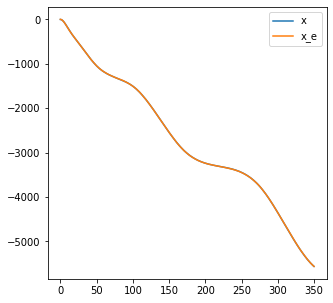

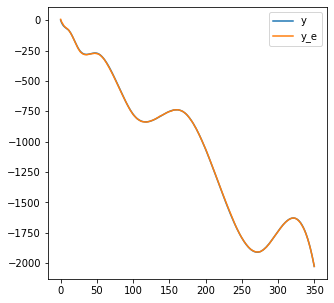

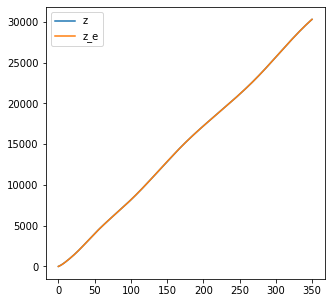

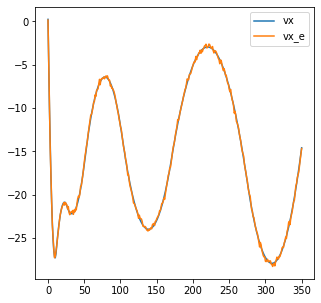

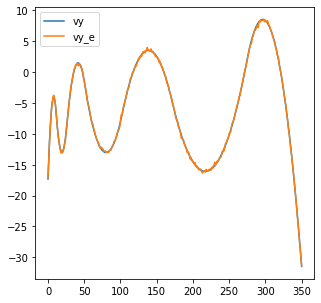

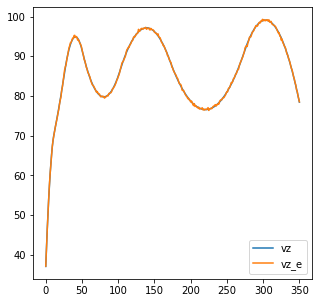

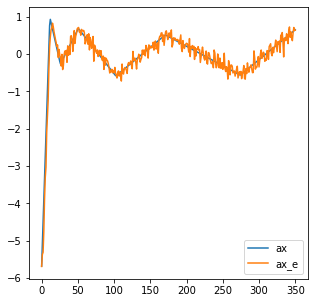

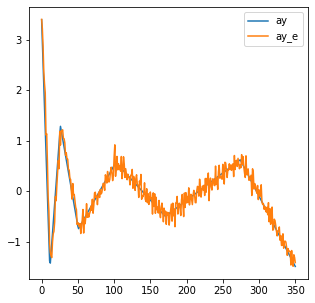

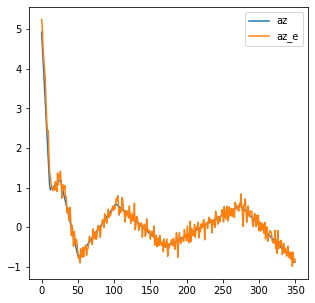

In [35]:
#posicion
p = p_data
p_e = x_e[:,0:3]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,0])
plt.plot(range(len(p_e)), p_e[:,0])
plt.legend(['x', 'x_e'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,1])
plt.plot(range(len(p_e)), p_e[:,1])
plt.legend(['y', 'y_e'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,2])
plt.plot(range(len(p_e)), p_e[:,2])
plt.legend(['z', 'z_e'])
plt.show()

#velocidad
v = v_data
v_e = x_e[:,3:6]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,0])
plt.plot(range(len(v_e)), v_e[:,0])
plt.legend(['vx', "vx_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,1])
plt.plot(range(len(v_e)), v_e[:,1])
plt.legend(['vy', "vy_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,2])
plt.plot(range(len(v_e)), v_e[:,2])
plt.legend(['vz', "vz_e"])
plt.show()


#aceleracion
a = a_data
a_e = x_e[:,6:9]

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,0])
plt.plot(range(len(a_e)), a_e[:,0])
plt.legend(['ax', "ax_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,1])
plt.plot(range(len(a_e)), a_e[:,1])
plt.legend(['ay', "ay_e"])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,2])
plt.plot(range(len(a_e)), a_e[:,2])
plt.legend(['az', "az_e"])
plt.show()

## Conclusiones:

* En el punto 1) y 2) se estima muy bien la posicion debido a que se tienen mediciones de posicion. La estimacion de velocidad y aceleracion siguen la tendencia pero con mucho ruido.
* En 2) se aprecia una leve mejor estimacion de la velocidad comparado con 1).
* En 3) se estima correctamente la velocidad debido a que en la estimacion se toma en cuenta mediciones de velocidad. La estimacion de la aceleracion tambien mejora considerablemente.
